In [5]:
#! ls /export/space0/yang-j/img

In [11]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline
imgPath = '/export/space0/yang-j/img/'

#
# read ALL filenames in the directory of imgPath
#
from PIL import Image
import glob
imgList = []
for filename in glob.glob(imgPath + '*.jpg'): #assuming gif
    imgList.append(filename)
    
m = len(imgList)
print(len(imgList))

183


(<matplotlib.image.AxesImage at 0x7f084cd3ab10>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

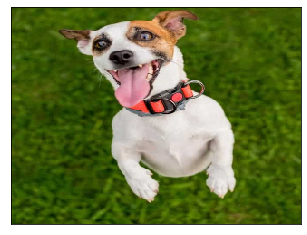

In [136]:
# resize all the images to 320x240
height = 240
width = 320
pxls = height * width

img = cv.imread(imgPath + '000001.jpg')
img = cv.resize(img, (width, height))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img), plt.xticks([]), plt.yticks([])

#print(img)



In [149]:
# RGB Color histgram
#     [hist_r, hist_g, hist_b] = [cv.calcHist([img],[channel],None,[4],[0,256])
#                                 for channel in range(3)]
    
#     colHist[i, :] = [  for channel, pxls in enumerate([hist_r, hist_g, hist_b])]
    
#     for idx in range(4):
#         correctedIdx = 1 * hist_r[idx] + 4 * hist_g[idx] + 16 * hist_b[idx]
#         colHist[i, :] = 
#     # colHist = 1 * hist_r + 4 * hist_g + 16 * hist_b
#     print(hist_g.shape)
#     #for chanel, x in enumerate([hist_r, hist_g, hist_b]):
#     #    hist = cv.calcHist([img],[chanel],None,[4],[0,256])
#     #    colHist[i, :] += hist.ravel()
#colHist = colHist / pxls # normalization
#print(colHist)

import numpy as np
import cv2 as cv
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:

methodDict = {"RGB":cv.COLOR_BGR2RGB , "LUV":cv.COLOR_BGR2LUV, "HSV":cv.COLOR_BGR2HSV}
def createColorHistgram(imgList, method, isSave = False):
    if method not in methodDict:
        print('error')
        sys.exit()
        
    cmdStr = methodDict[method]
    colHist = np.zeros([m, 64], dtype = np.int64)
    for i in range(len(imgList)):
        path = imgList[i]
        img = cv.imread(path)
        img = cv.resize(img, (width, height))
        img = cv.cvtColor(img, cmdStr)
        img = (np.int64)(img / 64)
        for w in range(width):
            for h in range(height):
                idx = 1 * img[h, w, 0] + 4 * img[h, w, 1] + 16 * img[h, w, 2]
                colHist[i, idx] += 1
    if isSave:
        with open('/home/yanai-lab/yang-j/www/imsearch/featureData/'+ method + '.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump(colHist, f)
    return colHist
            
            
#colHist = createColorHistgram(imgList, "RGB", False)
colHist = createColorHistgram(imgList, "HSV", True)
colHist = createColorHistgram(imgList, "LUV", True)

In [139]:
# make sure the sum of every row is 320*240 (the number of pixels in each image)
print(np.sum(colHist, axis = 1))
print(colHist.shape)

[76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76

In [145]:



# Getting back the objects:
#with open('objs.pkl') as f:  # Python 3: open(..., 'rb')
#    obj0, obj1, obj2 = pickle.load(f)


(<matplotlib.image.AxesImage at 0x7f084ccd4190>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'queryImage'))

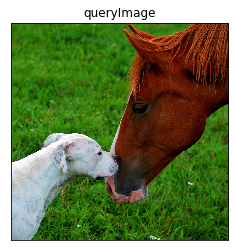

In [146]:
queryIdx = 6;
queryImg = plt.imread(imgList[queryIdx])
plt.imshow(queryImg), plt.xticks([]), plt.yticks([]), plt.title('queryImage')

In [147]:
queryHist = colHist[queryIdx, :] # get query image's color histgram

distMat = (colHist - queryHist) ** 2

In [148]:
dist  = np.sum(distMat, axis = 1)
#print(np.min(dist))

# Get the similar images in an order of whoses similiarity is from high to low
rsl = np.argsort(dist)

print(rsl)


[  6 115 105   0  51  93 175  92 174 177  75  82 138  73 101 128  83  66
 133 173  17  29  33 158 107 148  13 145  99  26  11  49 162 113 147  91
  97  69 126 143 137 182  96 155 116  14  53 111 141  39 161 136  98 110
  84 131 135 109  25 132  40 117  65  63   8  44  16 156 102 151 167 120
  10  79 127 124  54  89  12  35 149 119 129 104 108  67 164 146 100  43
 121 114 134 168  85 166  18  57  60 103  90  31  22 178 142  77  45  86
 140 118   7  68 172  41  42  19  94 160  64 112  74   5  30  37 106  76
 170 159 157  71  81 171 163  70  36 165  38   3 169  55  59  62 176 125
  24 152  50 139 123   4   1 180  56  32 181   2  80 144 130  61  34  20
  95  52  87 154 153  72  47 122 150  78  88  27  48  21  46  28  15   9
 179  23  58]


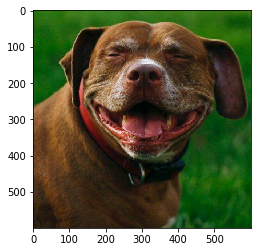

In [111]:
plt.imshow(plt.imread(imgList[115]))

In [160]:
# Searching Algorithm applied in CGI program

# import pickle
# import numpy as np
# def searchImages(queryIdx = 0, method = 'RGB'):
# #   Search similar images similar to the image wid "queryIdx" by "method"
# #   this function will return the sorted ARG as a result
# #
#     # preprocessing
#     try:
#         if method == 'RGB':
#             with open('featureData/RGB.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
#                featureHist = pickle.load(f)
#         elif method == 'DCNN':
#             pass
#         elif method == 'HSV':
#             pass
#         elif method == 'LUV':
#             pass
#     except IOError:
#         print("Could not read file")
    
#     m = featureHist.shape[0]
#     if queryIdx < 0 or queryIdx >= m:
#         print('Index overflow')
#         sys.exit()
        
#     # Caculating similarity
#     queryHist = featureHist[queryIdx, :] # get query image's color histgram
#     distMat = (featureHist - queryHist) ** 2
#     dist  = np.sum(distMat, axis = 1)

#     # Get the similar images in an order of whoses similiarity is from high to low
#     sortedIdx = np.argsort(dist)
#     score = np.sort(dist)
#     return sortedIdx, score
    
!pwd

/host/space0/yang-j/jupyter/notebook


In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
import time
import os
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

# proxyの設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "9, 12"    


vgg16 = models.vgg16(pretrained=True,progress=True)
softmax=nn.Softmax(dim=1)
# pretrained=True とすると，学習済みポラメータも読み込まれる．
# ~/.cache/torch/checkpoints/ に読み込まれます．VGG16は550MBもあるので，不要になったら消去しましょう．
# ls でダウンロードされていることを確認してみます．
! ls -l ~/.cache/torch/checkpoints/ 

合計 640564
-rw------- 1 yang-j YANAI_LAB 102502400  4月 21 19:12 resnet50-19c8e357.pth
-rw------- 1 yang-j YANAI_LAB 553433881  4月 26 16:59 vgg16-397923af.pth


In [170]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
vgg16fc7 = torch.nn.Sequential(
    vgg16.features,
    vgg16.avgpool,
    Flatten(),
    *list(vgg16.classifier.children())[:-3]  # 最後の3つのlayer(relu,dropout,fc1000)を削除
)
# 表示してみます．fc7 (fc4096)が最終出力になっているはずです．
print(vgg16fc7)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [171]:
vgg16fc7.eval()
with torch.no_grad():
    fc7=vgg16fc7(img)
print(fc7.shape)     # shapeの表示
print(fc7[0][0:100]) # fc7特徴量を最初の100次元分だけ表示してみます．

torch.Size([1, 4096])
tensor([-0.9627, -2.6840, -2.0833, -2.6684,  0.7189, -2.5070, -0.4601,  1.7593,
        -2.6612, -0.8815, -1.0407, -2.4764, -2.2983,  1.7255, -2.2517, -1.8774,
        -1.6923, -0.5173, -1.5689, -0.3882, -0.2352, -2.0224, -0.5251,  0.0982,
        -1.0707, -3.7208,  0.0388, -1.8065, -1.1865,  1.3755, -0.1042, -1.5888,
        -2.4502,  0.3509, -0.7681, -1.2082,  0.5052,  0.8744, -1.2261, -3.7075,
         0.2330, -1.9964, -1.6317, -0.9997,  1.6678, -2.5568, -2.0557, -0.8372,
         1.5033,  1.7459, -2.5404, -2.6466, -0.2227,  1.2663, -1.8080, -1.3911,
        -1.7164, -0.3256, -1.0901, -2.3305, -0.7457,  0.3871,  1.0549,  0.0146,
        -1.8454, -0.9237, -0.8057, -1.1799, -0.4766, -1.7361, -1.3471, -2.7115,
        -1.9325, -1.2233,  1.0255,  0.9222, -1.1552,  0.3078, -0.4981, -1.3460,
        -2.1629, -0.5794,  0.8063,  0.1529,  0.3081, -0.0704, -2.3654, -0.6935,
         0.5093, -0.0466, -2.3758, -0.1937, -0.3540,  1.2402, -0.4860, -0.2894,
        -3.4850, -

In [174]:
import glob
imglist=glob.glob(imgPath + '*.jpg')

in_size=224
imgs = np.empty((0,in_size,in_size,3), dtype=np.float32)

for i,img_path in enumerate(imglist):
    if i%100==0:
        print("reading {}th image".format(i))
    x = np.array(Image.open(img_path).resize((in_size,in_size)), dtype=np.float32)
    x = np.expand_dims(x, axis=0)
    imgs = np.vstack((imgs,x))
    
mean=np.array([0.485, 0.456, 0.406], dtype=np.float32)
std=np.array([0.229, 0.224, 0.225], dtype=np.float32)
imgs=(imgs/255.0-mean)/std
imgs=imgs.transpose(0,3,1,2)  # HWC -> CHW
img=torch.from_numpy(imgs)
print(imgs.shape)

reading 0th image
reading 100th image
(183, 3, 224, 224)


In [175]:
# 200枚処理するので，GPUを使います．
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vgg16fc7 = vgg16fc7.to(device)

vgg16fc7.eval()
with torch.no_grad():
    fc=vgg16fc7(img.to(device)).cpu().numpy()
    # gpuで処理した結果を cpuに戻して，numpy形式にします．
print(fc.shape)     # shapeの表示

(183, 4096)


In [176]:
with open('/home/yanai-lab/yang-j/www/imsearch/featureData/DCNN.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(fc, f)

In [179]:
print(type(fc))

<class 'numpy.ndarray'>


In [181]:
!ls /home/yanai-lab/yang-j/www/imsearch/featureData/

DCNN.pkl  HSV.pkl  LUV.pkl  RGB.pkl


In [ ]:
# CGI sourceCode
#!/usr/local/anaconda3/bin/python3
import pickle
import numpy as np
import cgi
from PIL import Image
import glob
featurePath = '/home/yanai-lab/yang-j/www/imsearch/featureData'

def searchImages(queryIdx = 0, method = 'RGB'):
#   Search similar images similar to the image wid "queryIdx" by "method"
#   this function will return the sorted ARG as a result
#
    # preprocessing
    try:
        if method == 'RGB':
            with open('featureData/RGB.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
        elif method == 'DCNN':
           with open('featureData/DCNN.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
        elif method == 'HSV':
           with open('featureData/HSV.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
        elif method == 'LUV':
            with open('featureData/LUV.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
    except IOError:
        print("Could not read file")

    m = featureHist.shape[0]
    if queryIdx < 0 or queryIdx >= m:
        print('Index overflow')
        sys.exit()

    # Caculating similarity
    queryHist = featureHist[queryIdx, :] # get query image's color histgram
    distMat = (featureHist - queryHist) ** 2
    dist  = np.sum(distMat, axis = 1)
    dist  = dist / np.linalg.norm(dist)

    # Get the similar images in an order of whoses similiarity is from high to low
    sortedIdx = np.argsort(dist)
    score = np.sort(dist)
    return sortedIdx, score

print("Content-type:text/html\r\n\r\n")


imgPath = 'img/'

imgList = []
for filename in glob.glob(imgPath + '*.jpg'): #assuming gif
    imgList.append(filename)

m = len(imgList)

num_in_row = 10
row = (int)(m /num_in_row)
remain = m % num_in_row

queryIdx = 0
feature = "RGB"

link = cgi.FieldStorage()
if "queryIdx" in link:
        queryIdx = (int)(link["queryIdx"].value)
if "feature" in link:
        feature = link["feature"].value


sortedIdx, score = searchImages(queryIdx, feature)

if len(sortedIdx) != len(imgList):
        print('Need to update feature database')
        sys.exit()

print ('<html>')
print ('<head>')
print ('<title>Image Searching CGI Program</title>')
print ('</head>')

print ('<body>')
#print(sortedIdx, score)
print ('<h3>Click a picture to find the similar images and select the feature you\'d like to use below</h3>')

print('<table><tbody><tr>')
print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'RGB')  + '" METHOD = "POST">')
print('<input type="submit" value="RGB" />')
print('</form>')

print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'LUV')  + '" METHOD = "POST">')
print('<input type="submit" value="LUV" />')
print('</form>')

print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'HSV')  + '" METHOD = "POST">')
print('<input type="submit" value="HSV" />')
print('</form>')

print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'DCNN')  + '" METHOD = "POST">')
print('<input type="submit" value="DCNN(vgg16 fc7)" />')
print('</form>')

print('</tr></tbody></table>')

print('<h2>Query Image</h2>')
#print(queryIdx, imgList[queryIdx])
print('<img src = "'+ imgList[queryIdx] + '" width = "120" height = "90">')

print('<hr>')
print('<h2>Related Images</h2>')
# print(row, remain)
print("<table border='5' cellspacing='1' cellpadding='2'><tbody>")
# LOOP here
for i in range(row):
        print('<tr>')
        row_num = i * 10
        for j in range(num_in_row):
                idx = row_num + j
                print("<td align='CENTER'>")
                print("<a href = '" + "?queryIdx=%d&feature=%s" %( sortedIdx[idx], feature) + "'><img src='" + imgList[sortedIdx[idx]] + "' width='120' height='90'></a>")
                print("<br>["+ str(idx) + "]:"+ str(score[idx]) + "</td>")
        print('</tr>')
#print(idx)
if remain != 0:
        #print('<tr>')
        idx =  1#row * num_in_row
        for i in range(remain):
                idx = row_num + i
         #       print("<td align='CENTER'>")
          #      print("<a href = '" + "?queryIdx=%d" % idx + "'><img src='" + imgList[1] + "' width='120' height='90'></a>")
           #     print("<br>["+ str(idx) + "]:"+ imgScore + "</td>")
        #print('</tr>')


print('</tbody></table>')
print('</body>')
print('</html>')